In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading csv

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df_train.shape

(19237, 18)

In [4]:
df_test=pd.read_csv('test.csv')
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [5]:
df_train['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
LANCIA              1
GREATWALL           1
HAVAL               1
PONTIAC             1
Name: Manufacturer, Length: 65, dtype: int64

In [6]:
df_train.groupby('Manufacturer')['Price'].mean()

Manufacturer
ACURA             5910.933333
ALFA ROMEO        9890.250000
ASTON MARTIN     54000.000000
AUDI             14106.545098
BENTLEY         197574.500000
                    ...      
VAZ               4613.583333
VOLKSWAGEN       11640.421416
VOLVO            10278.894737
ZAZ               3822.500000
სხვა             17248.500000
Name: Price, Length: 65, dtype: float64

## Inspecting data

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [9]:
df_train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [10]:
df_test['Engine volume'].unique()

array(['2.0 Turbo', '2.4', '1.5', '3.2', '1.6', '4.6', '3.5', '2', '1.8',
       '2.5', '1.7', '2.2 Turbo', '2.3 Turbo', '4', '1.3', '3',
       '1.4 Turbo', '2.2', '3.0 Turbo', '3.3', '2.9 Turbo', '1.4',
       '3.2 Turbo', '4.8', '3.6', '2.7', '1.8 Turbo', '1', '1.5 Turbo',
       '2.4 Turbo', '0.7', '5.5', '1.7 Turbo', '4.4', '4.7', '5', '1.2',
       '2.8', '3.8', '1.6 Turbo', '2.6', '5.3', '3.7', '5.7', '6.6',
       '1.3 Turbo', '2.3', '0.2', '4.7 Turbo', '2.5 Turbo', '6.4', '5.6',
       '1.9 Turbo', '3.4', '5.5 Turbo', '6.7', '0.4', '4.4 Turbo',
       '2.7 Turbo', '4.2', '2.1', '2.1 Turbo', '6.2', '0.8 Turbo', '0',
       '6', '4.3', '1.9', '1.1', '4.6 Turbo', '3.1', '1.2 Turbo', '0.8',
       '3.5 Turbo', '0.6 Turbo', '4.5 Turbo', '6.3', '6.1', '4.8 Turbo',
       '0.5', '4.0 Turbo', '3.6 Turbo', '10.8', '0.7 Turbo', '5.4',
       '3.7 Turbo', '4.2 Turbo', '4.5', '0.6', '2.8 Turbo', '2.9',
       '0.3 Turbo', '1.0 Turbo', '5.2', '6.0 Turbo', '3.9', '2.6 Turbo'],
      dtype=o

https://www.webuyanycar.com/guides/car-ownership/car-engine-sizes/

## Feature Engineering

In [11]:
df_train['Engine volume']=df_train['Engine volume'].replace(to_replace='0',value=df_train['Engine volume'].mode()[0])
df_test['Engine volume']=df_test['Engine volume'].replace(to_replace='0',value=df_test['Engine volume'].mode()[0])

In [12]:
df_train['Turbo']=df_train['Engine volume'].str.split(expand=True)[1]
df_test['Turbo']=df_test['Engine volume'].str.split(expand=True)[1]

In [13]:
df_train['Engine volume']=df_train['Engine volume'].str.split(expand=True)[0]
df_test['Engine volume']=df_test['Engine volume'].str.split(expand=True)[0]

In [14]:
df_train['Engine volume']=df_train['Engine volume'].astype('float')
df_test['Engine volume']=df_test['Engine volume'].astype('float')

In [15]:
df_train['Turbo']=df_train['Turbo'].fillna('No')
df_test['Turbo']=df_test['Turbo'].fillna('No')

In [16]:
df_train['Turbo']=df_train['Turbo'].replace({'Turbo':'Yes'})
df_test['Turbo']=df_test['Turbo'].replace({'Turbo':'Yes'})

In [17]:
df_train['Engine volume']=df_train['Engine volume']*1000
df_test['Engine volume']=df_test['Engine volume']*1000

In [18]:
df_train['Levy']=df_train['Levy'].replace({'-':'0'})
df_train['Levy']=df_train['Levy'].astype('int')

In [19]:
df_test['Levy']=df_test['Levy'].replace({'-':'0'})
df_test['Levy']=df_test['Levy'].astype('int')

In [20]:
df_train['Price']=df_train['Price'].astype('float')
df_test['Price']=df_test['Price'].astype('float')

In [21]:
df_train['Mileage']=df_train['Mileage'].str.replace(' km','')
df_test['Mileage']=df_test['Mileage'].str.replace(' km','')

In [22]:
df_train['Mileage']=df_train['Mileage'].astype('float')
df_test['Mileage']=df_test['Mileage'].astype('float')

In [23]:
df_train['Mileage']=df_train['Mileage'].replace({0:df_train['Mileage'].median()})
df_test['Mileage']=df_test['Mileage'].replace({0:df_test['Mileage'].median()})

In [24]:
df_train['Drive wheels']=df_train['Drive wheels'].replace({'4x4':'All'})
df_test['Drive wheels']=df_test['Drive wheels'].replace({'4x4':'All'})

In [25]:
df_train['Doors']=df_train['Doors'].replace({'04-May':'4-5','02-Mar':'2-3'})
df_test['Doors']=df_test['Doors'].replace({'04-May':'4-5','02-Mar':'2-3'})

In [26]:
df_train=df_train.drop(['Model','ID'],axis=1)
df_test=df_test.drop(['Model','ID'],axis=1)

In [27]:
df_train.shape

(19237, 17)

In [28]:
df_test.shape

(8245, 17)

## EDA

In [29]:
df=df_train.copy(deep=True)

In [30]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,LEXUS,2010,Jeep,Yes,Hybrid,3500.0,186005.0,6.0,Automatic,All,4-5,Left wheel,Silver,12,No
1,16621.0,1018,CHEVROLET,2011,Jeep,No,Petrol,3000.0,192000.0,6.0,Tiptronic,All,4-5,Left wheel,Black,8,No
2,8467.0,0,HONDA,2006,Hatchback,No,Petrol,1300.0,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,No
3,3607.0,862,FORD,2011,Jeep,Yes,Hybrid,2500.0,168966.0,4.0,Automatic,All,4-5,Left wheel,White,0,No
4,11726.0,446,HONDA,2014,Hatchback,Yes,Petrol,1300.0,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  float64
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
 16  Turbo             19237 non-null  object

In [32]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [33]:
df_train[df_train['Price']>df_train['Price'].quantile(0.98)]

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
56,87112.0,0,MERCEDES-BENZ,2019,Jeep,Yes,Petrol,2000.0,5323.0,4.0,Tiptronic,All,4-5,Left wheel,Grey,0,Yes
90,77775.0,1604,MERCEDES-BENZ,2014,Jeep,Yes,Petrol,5500.0,433811.0,8.0,Automatic,All,4-5,Left wheel,Black,10,No
111,85553.0,1156,FORD,2017,Jeep,Yes,Petrol,2300.0,100567.0,4.0,Automatic,Front,4-5,Left wheel,Black,4,No
159,72130.0,1079,LEXUS,2018,Jeep,Yes,Petrol,2000.0,18918.0,4.0,Tiptronic,Front,4-5,Left wheel,Black,6,Yes
211,72130.0,1885,PORSCHE,2010,Hatchback,Yes,Petrol,4800.0,196800.0,8.0,Tiptronic,All,4-5,Left wheel,White,8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18815,111002.0,1228,FORD,2018,Jeep,Yes,Petrol,2300.0,30475.0,4.0,Automatic,Front,4-5,Left wheel,Grey,4,No
18881,147397.0,0,JAGUAR,2017,Jeep,No,Diesel,2000.0,17060.0,1.0,Automatic,All,4-5,Left wheel,Grey,0,No
18941,96263.0,866,FORD,2015,Sedan,Yes,Petrol,2300.0,43770.0,4.0,Automatic,Front,4-5,Left wheel,White,4,No
19085,97219.0,1079,LEXUS,2018,Jeep,Yes,Petrol,2000.0,25600.0,4.0,Tiptronic,Front,>5,Left wheel,White,7,Yes


C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\si

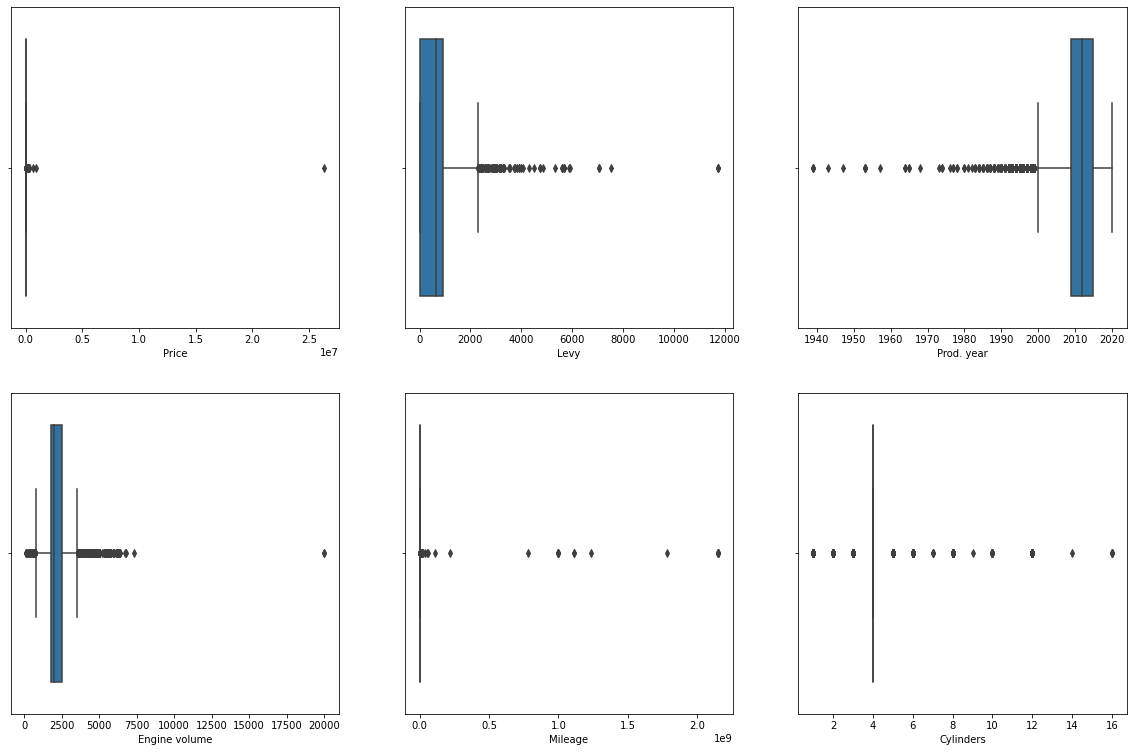

In [34]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,13))
for variable,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df[variable],ax=subplot)
plt.show()

In [35]:
df['Prod. year'].quantile(1.0)

2020.0

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prod. year'>

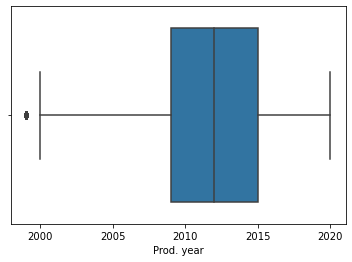

In [36]:
q1=df['Prod. year'].quantile(0.25)
q3=df['Prod. year'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
lc=df['Prod. year'].quantile(0.05)
for i in df['Prod. year'].index:
       if df['Prod. year'].loc[i]<lb:
             df['Prod. year'].loc[i]=lc
sns.boxplot(df['Prod. year'])

Price and mileage have one large outlier,hence treating outliers on both columns

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

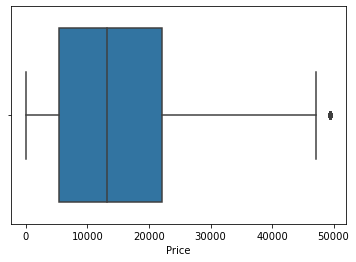

In [37]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
uc=df['Price'].quantile(0.95)
lc=df['Price'].quantile(0.05)
for i in df['Price'].index:
        if df['Price'].loc[i]>ub:
            df['Price'].loc[i]=uc
        if df['Price'].loc[i]<lb:
             df['Price'].loc[i]=lc
sns.boxplot(df['Price'])

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\sharm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

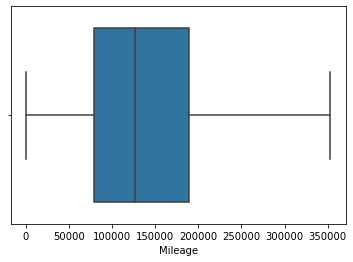

In [38]:
q1=df['Mileage'].quantile(0.25)
q3=df['Mileage'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
uc=df['Mileage'].quantile(0.95)
lc=df['Mileage'].quantile(0.05)
for i in df['Mileage'].index:
    if df['Mileage'].loc[i]>ub:
        df['Mileage'].loc[i]=uc
    if df['Mileage'].loc[i]<lb:
        df['Mileage'].loc[i]=lc
sns.boxplot(df['Mileage'])        

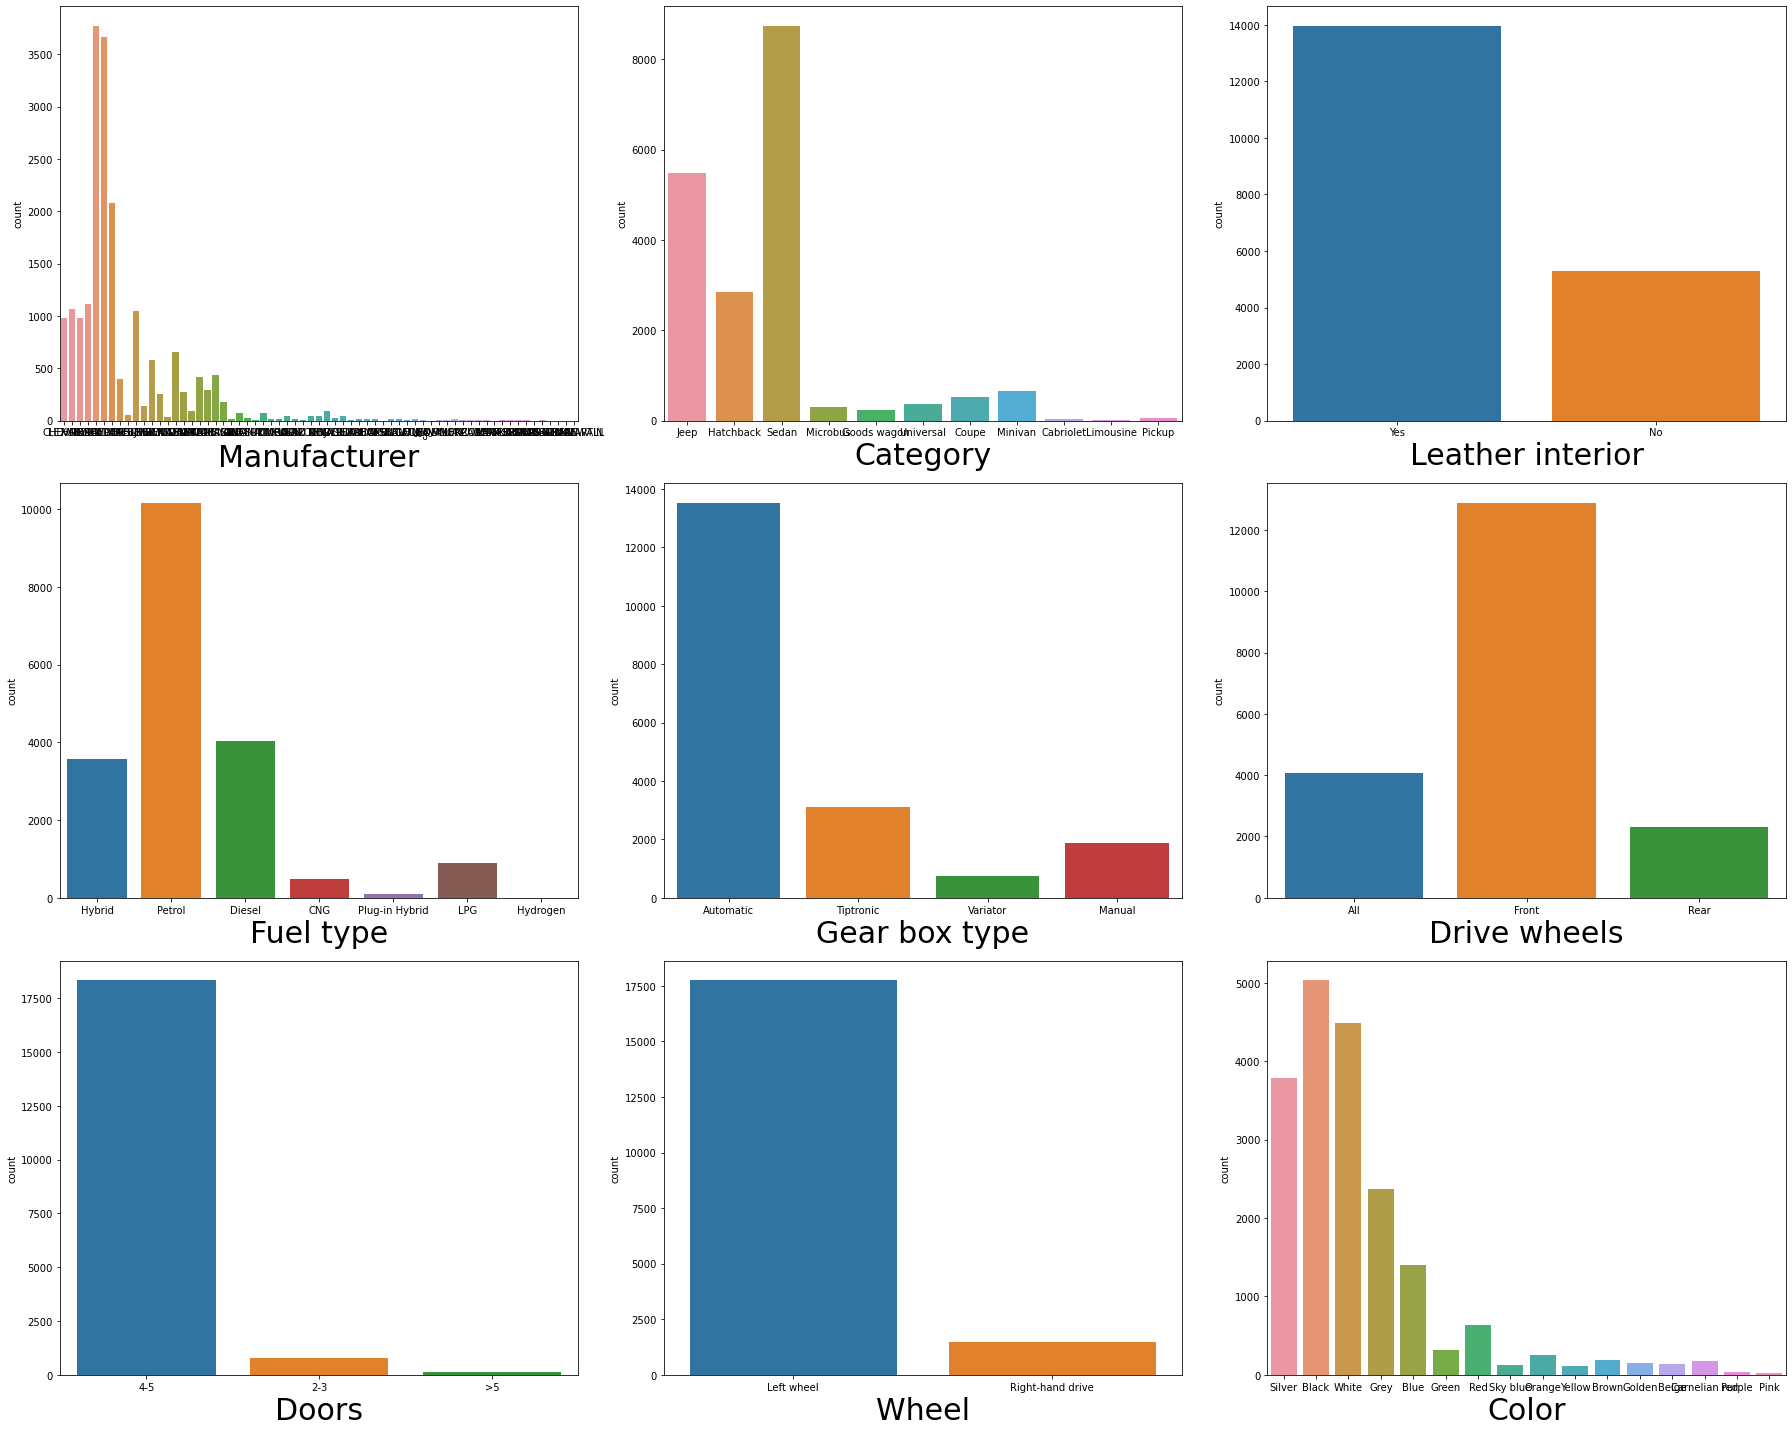

In [39]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(25, 20))
for variable,subplot in zip(df[df_cat.columns].columns,ax.flatten()):
    countplot = sns.countplot(x=df[variable],ax=subplot )
    countplot.set_xlabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

In [40]:
df['Color'].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [41]:
color=df.groupby('Color')['Price'].mean()
df['Color']=df['Color'].map(color)
df_test['Color']=df_test['Color'].map(color)

In [42]:
mft=df.groupby('Manufacturer')['Price'].mean()
df['Manufacturer']=df['Manufacturer'].map(mft)
df_test['Manufacturer']=df_test['Manufacturer'].map(mft)

In [43]:
airbags=df['Airbags'].value_counts()

In [44]:
freq=airbags[airbags<500].index

In [45]:
for i in range(len(df['Airbags'])):
    if df['Airbags'][i] in freq:
        df['Airbags'][i]='Others'
for i in range(len(df_test['Airbags'])):
    if df_test['Airbags'][i] in freq:
        df_test['Airbags'][i]='Others'

<ipython-input-45-2d986ed09f8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airbags'][i]='Others'
C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-45-2d986ed09f8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Airbags'][i]='Others'


In [46]:
air_mean=df.groupby('Airbags')['Price'].mean()

In [47]:
df['Airbags']=df['Airbags'].map(air_mean)
df_test['Airbags']=df_test['Airbags'].map(air_mean)

In [48]:
df['Doors'].value_counts()

4-5    18332
2-3      777
>5       128
Name: Doors, dtype: int64

In [49]:
door=df.groupby('Doors')['Price'].mean()
df['Doors']=df['Doors'].map(door)
df_test['Doors']=df_test['Doors'].map(door)

In [50]:
df['Cylinders'].value_counts()

4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
14.0        1
9.0         1
Name: Cylinders, dtype: int64

In [51]:
cyl=df.groupby('Cylinders')['Price'].mean()
df['Cylinders']=df['Cylinders'].map(cyl)
df_test['Cylinders']=df_test['Cylinders'].map(cyl)

In [52]:
dw=df.groupby('Drive wheels')['Price'].mean()
df['Drive wheels']=df['Drive wheels'].map(dw)
df_test['Drive wheels']=df_test['Drive wheels'].map(dw)

In [53]:
gb=df.groupby('Gear box type')['Price'].mean()
df['Gear box type']=df['Gear box type'].map(gb)
df_test['Gear box type']=df_test['Gear box type'].map(gb)

In [54]:
fuel=df.groupby('Fuel type')['Price'].mean()
df['Fuel type']=df['Fuel type'].map(fuel)
df_test['Fuel type']=df_test['Fuel type'].map(fuel)

In [55]:
cat=df.groupby('Category')['Price'].mean()
df['Category']=df['Category'].map(cat)
df_test['Category']=df_test['Category'].map(cat)

In [56]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399,16547.970468,2010.0,21105.256897,Yes,10634.534377,3500.0,186005.0,14614.252166,15186.405801,16370.348940,16034.161521,Left wheel,14745.363397,12156.788115,No
1,16621.0,1018,14686.131899,2011.0,21105.256897,No,15804.373005,3000.0,192000.0,14614.252166,22741.560928,16370.348940,16034.161521,Left wheel,16850.507848,18034.301617,No
2,8467.0,0,13592.452405,2006.0,11312.522304,No,15804.373005,1300.0,200000.0,16049.410663,14583.975871,15950.339055,16034.161521,Right-hand drive,16850.507848,10450.899625,No
3,3607.0,862,14109.150315,2011.0,21105.256897,Yes,10634.534377,2500.0,168966.0,16049.410663,15186.405801,16370.348940,16034.161521,Left wheel,16794.134106,11184.234927,No
4,11726.0,446,13592.452405,2014.0,11312.522304,Yes,15804.373005,1300.0,91901.0,16049.410663,15186.405801,15950.339055,16034.161521,Left wheel,14745.363397,21575.066117,No


In [57]:
df_enc=pd.get_dummies(df,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [58]:
df_enc.head()

,Price,Levy,Manufacturer,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Leather interior_Yes,Wheel_Right-hand drive,Turbo_Yes
0,13328.0,1399,16547.970468,2010.0,21105.256897,10634.534377,3500.0,186005.0,14614.252166,15186.405801,16370.348940,16034.161521,14745.363397,12156.788115,1,0,0
1,16621.0,1018,14686.131899,2011.0,21105.256897,15804.373005,3000.0,192000.0,14614.252166,22741.560928,16370.348940,16034.161521,16850.507848,18034.301617,0,0,0
2,8467.0,0,13592.452405,2006.0,11312.522304,15804.373005,1300.0,200000.0,16049.410663,14583.975871,15950.339055,16034.161521,16850.507848,10450.899625,0,1,0
3,3607.0,862,14109.150315,2011.0,21105.256897,10634.534377,2500.0,168966.0,16049.410663,15186.405801,16370.348940,16034.161521,16794.134106,11184.234927,1,0,0
4,11726.0,446,13592.452405,2014.0,11312.522304,15804.373005,1300.0,91901.0,16049.410663,15186.405801,15950.339055,16034.161521,14745.363397,21575.066117,1,0,0


In [59]:
df_test.head()

,Levy,Manufacturer,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price,Leather interior_Yes,Wheel_Right-hand drive,Turbo_Yes
0,0,11606.682211,2012,11312.522304,22634.487364,2000.0,127675.0,16049.410663,11288.031467,15950.339055,14638.061776,17941.784000,21360.625442,NaN,0,0,1
1,0,21591.518705,2012,13675.423993,15804.373005,2400.0,26000.0,16049.410663,22741.560928,15950.339055,16034.161521,17941.784000,21360.625442,NaN,1,0,0
2,0,10032.327273,2005,13675.423993,15804.373005,1500.0,168000.0,16049.410663,15186.405801,15950.339055,16034.161521,14055.114754,18034.301617,NaN,0,1,0
3,975,10278.894737,2012,21105.256897,15804.373005,3200.0,143000.0,14614.252166,15186.405801,16370.348940,16034.161521,14310.921920,12156.788115,NaN,1,0,0
4,0,7028.355164,1993,11312.522304,15804.373005,1600.0,200000.0,16049.410663,11288.031467,15950.339055,16034.161521,16850.507848,11184.234927,NaN,0,0,0


##  Model building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_absolute_error

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [62]:
x=df_enc.drop('Price',axis=1)
y=df_enc['Price']
df_test=df_test.drop('Price',axis=1)

In [63]:
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [64]:
df_test['Cylinders']=df_test['Cylinders'].fillna(df_test['Cylinders'].mode()[0])
df_test['Manufacturer']=df_test['Manufacturer'].fillna(df_test['Manufacturer'].mode()[0])

In [65]:
test_scaled=pd.DataFrame(ss.fit_transform(df_test),columns=df_test.columns)

In [85]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

,Unnamed: 0,Price
0,0,20840.162
1,1,14177.389
2,2,7748.245
3,3,2239.069
4,4,5352.356


## ANN with keras-tuner

In [67]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

<ipython-input-68-454723b13226>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [69]:
x.shape

(19237, 16)

In [70]:
#function for identifying potential number of layers and neurons
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=10,
                                            max_value=1000,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [71]:
#using randomsearch from kerastuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

INFO:tensorflow:Reloading Oracle from existing project project\Air Quality Index\oracle.json
INFO:tensorflow:Reloading Tuner from project\Air Quality Index\tuner0.json


In [72]:
tuner.search_space_summary()

Search space summary
Default search space size: 14
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [73]:
#finding suitable neural network for the dataset
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [74]:
#tunning summary
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 480
units_1: 96
learning_rate: 0.01
units_2: 320
units_3: 512
units_4: 96
Score: 5048.947916666667
Trial summary
Hyperparameters:
num_layers: 5
units_0: 416
units_1: 128
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
Score: 5326.429850260417
Trial summary
Hyperparameters:
num_layers: 3
units_0: 352
units_1: 64
learning_rate: 0.01
units_2: 160
units_3: 512
units_4: 384
units_5: 256
units_6: 160
units_7: 352
units_8: 256
units_9: 320
units_10: 448
units_11: 384
Score: 5330.5751953125
Trial summary
Hyperparameters:
num_layers: 12
units_0: 320
units_1: 192
learning_rate: 0.01
units_2: 512
units_3: 288
units_4: 512
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 5343.669270833333
Trial summary
Hyperparameters:
num_layers: 7
units_0: 256
units_1: 320
le

In [75]:
#building neural network
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(480,activation='relu',input_dim = 16))
# Adding hidden layer
model.add(Dense(96, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.22)) ##adding dropout to avoid overfitting
model.add(Dense(512, activation='relu'))

model.add(Dense(96, activation='relu'))
# Adding the output layer
model.add(Dense(1,activation='linear'))

# Compiling the ANN
model.compile(
        optimizer=keras.optimizers.Adagrad(
            learning_rate=0.01),loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [76]:
#applying earlystopping method to terminate training when overfitting
model_history=model.fit(x_scaled, y,validation_split=0.3,epochs=120,batch_size=45,callbacks=keras.callbacks.EarlyStopping(patience=3))

Epoch 1/120
300/300 [==============================] - 2s 6ms/step - loss: 7544.4155 - mean_absolute_error: 7544.4155 - val_loss: 6079.2695 - val_mean_absolute_error: 6079.2695
Epoch 2/120
300/300 [==============================] - 1s 4ms/step - loss: 5780.4956 - mean_absolute_error: 5780.4956 - val_loss: 5589.0449 - val_mean_absolute_error: 5589.0449
Epoch 3/120
300/300 [==============================] - 1s 4ms/step - loss: 5495.3501 - mean_absolute_error: 5495.3501 - val_loss: 5720.1045 - val_mean_absolute_error: 5720.1045
Epoch 4/120
300/300 [==============================] - 1s 5ms/step - loss: 5384.1636 - mean_absolute_error: 5384.1636 - val_loss: 5362.6460 - val_mean_absolute_error: 5362.6460
Epoch 5/120
300/300 [==============================] - 1s 4ms/step - loss: 5285.9473 - mean_absolute_error: 5285.9473 - val_loss: 5426.8989 - val_mean_absolute_error: 5426.8989
Epoch 6/120
300/300 [==============================] - 1s 5ms/step - loss: 5226.5908 - mean_absolute_error: 5226.59

In [77]:
prediction=model.predict(test_scaled)

In [86]:
sample['Price']= prediction

In [87]:
sample

,Unnamed: 0,Price
0,0,17898.304688
1,1,20542.695312
2,2,7199.078613
3,3,3646.322266
4,4,3047.301514
...,...,...
8240,8240,8024.749512
8241,8241,29374.720703
8242,8242,2410.547363
8243,8243,21004.648438
